# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы Самодуров Никикта Сергеевич БПИ2303
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

Кратчайшие расстояния от вершины A
A → A: 0
A → B: 6
A → C: 9
A → D: 14
A → E: 8

Кратчайший путь из A в D: A → E → C → D


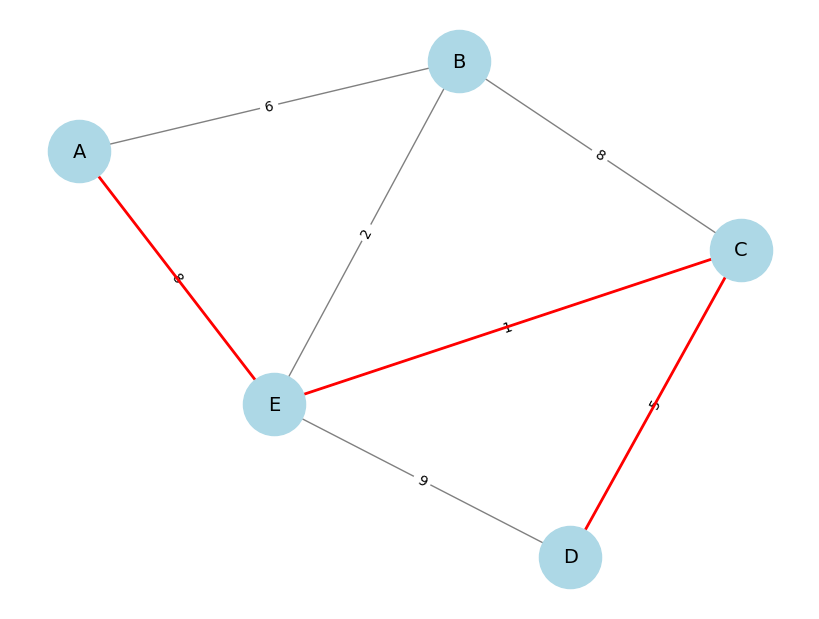

   Число узлов  Число рёбер  Время выполнения (сек.)
0            5            5                 0.000007
1           10           10                 0.000009
2           15           15                 0.000015
3           20           20                 0.000021
4           25           25                 0.000034
5           30           30                 0.000044
6           35           35                 0.000059
7           40           40                 0.000073
8           45           45                 0.000085
9           50           50                 0.000104


In [71]:
import random
import time
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import pandas as pd  

# Функция для генерации случайного графа
def generate_graph(num_nodes, edge_probability=0.5, weight_range=(1, 10)):
    graph = {chr(65 + i): {} for i in range(num_nodes)}  # Генерируем вершины 
    
    for node in graph:
        for other in graph:
            if node != other and random.random() < edge_probability:
                weight = random.randint(*weight_range)
                graph[node][other] = weight
                graph[other][node] = weight 
    
    return graph

# Алгоритм Дейкстры + восстановление пути
def dijkstra(graph, start, end=None):
    pq = [(0, start)]  # Очередь с приоритетами (расстояние, вершина)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    predecessors = {node: None for node in graph}  # Для восстановления пути
    
    while pq:
        current_distance, current_node = heapq.heappop(pq)
        
        # Пропускаем вершины, если уже нашли более короткий путь
        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))
    
    # Восстановление пути
    path = []
    if end and distances[end] != float('inf'):
        current = end
        while current is not None:
            path.append(current)
            current = predecessors[current]
        path.reverse()
    
    return distances, path if path else None

# Визуализация графа с кратчайшим путем
def draw_graph(graph, shortest_path=None):
    G = nx.Graph() 
    for node, edges in graph.items():
        for neighbor, weight in edges.items():
            G.add_edge(node, neighbor, weight=weight)
    
    pos = nx.spring_layout(G)  # Расположение узлов
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=14)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    # Выделяем кратчайший путь
    if shortest_path and len(shortest_path) > 1:
        path_edges = list(zip(shortest_path, shortest_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
    
    plt.show()

# Анализ временной сложности
def analyze_complexity():
    results = []
    for num_nodes in range(5, 51, 5):  # Проверяем графы от 5 до 50 узлов
        graph = generate_graph(num_nodes, 0.5)  # Создаем граф с 50% вероятностью рёбер
        start_node = 'A'
        
        start_time = time.time()
        dijkstra(graph, start_node)
        end_time = time.time()
        
        results.append((num_nodes, len(graph), end_time - start_time))
    
    # Составляем таблицу с результатами
    df = pd.DataFrame(results, columns=['Число узлов', 'Число рёбер', 'Время выполнения (сек.)'])
    print(df)  # Выводим таблицу

# Основная программа
graph = generate_graph(5, 0.6)  # 5 узлов, вероятность ребра 60%
start_node = 'A'
end_node = 'D'
distances, shortest_path = dijkstra(graph, start_node, end_node)

print("Кратчайшие расстояния от вершины", start_node)
for node, dist in distances.items():
    print(f"{start_node} → {node}: {dist}")

# Проверяем, есть ли путь в графе перед выводом
if shortest_path:
    print(f"\nКратчайший путь из {start_node} в {end_node}: {' → '.join(shortest_path)}")
else:
    print(f"\nНет пути из {start_node} в {end_node}!")

draw_graph(graph, shortest_path)
analyze_complexity()


In [ ]:
#2.Алгоритм Беллмана-Форда

import networkx as nx
import matplotlib.pyplot as plt

def bellman_ford(graph, start, end):
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0
    previous_nodes = {node: None for node in graph.nodes}

    for _ in range(len(graph.nodes) - 1):
        for u, v, data in graph.edges(data=True):
            weight = data['weight']
            if distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                previous_nodes[v] = u

    path = []
    current_node = end
    while previous_nodes[current_node] is not None:
        path.append(current_node)
        current_node = previous_nodes[current_node]
    path.append(start)
    return distances[end], path[::-1]

def draw_graph(graph, path=[]):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=700)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw(graph, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title("Визуализация графа с кратчайшим путем")
    plt.show()

def run_bellman_ford(graph):
    source = int(input("Введите начальную вершину для Беллмана-Форда: "))
    target = int(input("Введите конечную вершину для Беллмана-Форда: "))

    if source not in graph or target not in graph:
        print("Ошибка: Одна или обе вершины не существуют в графе.")
    else:
        distance, path = bellman_ford(graph, source, target)
        if path:
            print(f"Алгоритм Беллмана-Форда: Кратчайшее расстояние: {distance}")
            print(f"Путь: {path}")
            draw_graph(graph, path)
        else:
            print("Нет пути между вершинами.")
# 3.Алгоритм Йена
import networkx as nx
import matplotlib.pyplot as plt

def yen_algorithm(graph, start, end, k=3):
    all_paths = []
    for i in range(k):
        distance, path = dijkstra(graph, start, end)
        if path:
            all_paths.append(path)
            # Убираем найденный путь из графа
            for i in range(len(path) - 1):
                graph.remove_edge(path[i], path[i + 1])
        else:
            break
    return all_paths

def draw_graph(graph, path=[]):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=700)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

    if path:
        for p in path:
            path_edges = list(zip(p, p[1:]))
            nx.draw(graph, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title("Визуализация графа с кратчайшими путями")
    plt.show()

def run_yen(graph):
    source = int(input("Введите начальную вершину для Йена: "))
    target = int(input("Введите конечную вершину для Йена: "))

    if source not in graph or target not in graph:
        print("Ошибка: Одна или обе вершины не существуют в графе.")
    else:
        paths = yen_algorithm(graph, source, target)
        for idx, path in enumerate(paths):
            print(f"Путь {idx + 1}: {path}")
        draw_graph(graph, paths)
# 4.Алгоритм Левита
import networkx as nx
import matplotlib.pyplot as plt
import heapq

def levit_algorithm(graph, start, end):
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0
    previous_nodes = {node: None for node in graph.nodes}
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_node == end:
            path = []
            while previous_nodes[current_node] is not None:
                path.append(current_node)
                current_node = previous_nodes[current_node]
            path.append(start)
            return distances[end], path[::-1]

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    return float('inf'), []

def draw_graph(graph, path=[]):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=700)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw(graph, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title("Визуализация графа с кратчайшим путем")
    plt.show()

def run_levit(graph):
    source = int(input("Введите начальную вершину для Левита: "))
    target = int(input("Введите конечную вершину для Левита: "))

    if source not in graph or target not in graph:
        print("Ошибка: Одна или обе вершины не существуют в графе.")
    else:
        distance, path = levit_algorithm(graph, source, target)
        if path:
            print(f"Алгоритм Левита: Кратчайшее расстояние: {distance}")
            print(f"Путь: {path}")
            draw_graph(graph, path)
        else:
            print("Нет пути между вершинами.")
# 5.Алгоритм Джонсона

import networkx as nx
import matplotlib.pyplot as plt
import heapq

def johnson(graph):
    # Добавляем вспомогательную вершину для алгоритма Джонсона
    super_source = len(graph.nodes) + 1
    graph.add_node(super_source)

    for node in graph.nodes:
        graph.add_edge(super_source, node, weight=0)

    # Запускаем алгоритм Беллмана-Форда от супер-источника
    distances, _ = bellman_ford(graph, super_source, super_source)

    # Убираем вспомогательную вершину
    graph.remove_node(super_source)

    # Перерасчитываем веса рёбер
    for u, v, data in graph.edges(data=True):
        data['weight'] += distances[u] - distances[v]

    # Теперь запускаем алгоритм Дейкстры от каждой вершины
    all_pairs_shortest_paths = {}
    for node in graph.nodes:
        all_pairs_shortest_paths[node] = dijkstra(graph, node, node)

    return all_pairs_shortest_paths

def draw_graph(graph, path=[]):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=700)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw(graph, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title("Визуализация графа с кратчайшим путем")
    plt.show()

def run_johnson(graph):
    source = int(input("Введите начальную вершину для Джонсона: "))
    target = int(input("Введите конечную вершину для Джонсона: "))

    if source not in graph or target not in graph:
        print("Ошибка: Одна или обе вершины не существуют в графе.")
    else:
        all_paths = johnson(graph)
        print(f"Алгоритм Джонсона: Кратчайшее расстояние от {source} до {target}: {all_paths[source][target]}")
        draw_graph(graph)